In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df_africa = pd.read_csv('AfricaRabies05_25.csv')
df_america = pd.read_csv('AmericasRabies05_25.csv')
df_asia = pd.read_csv('AsiaRabies05_25.csv')
df_europe = pd.read_csv('EuropeRabies05_25.csv')
df_israel = pd.read_csv('DataRabiesIsrael06_25.csv')

#Cases of rabies in animals in four parts of the world (Africa, America, Asia, Europe)


In [2]:
df_africa['Continent'] = 'Africa'
df_america['Continent'] = 'Americas'
df_asia['Continent'] = 'Asia'
df_europe['Continent'] = 'Europe'

df_combined = pd.concat([df_africa, df_america, df_asia, df_europe], ignore_index=True)

df_combined.columns = df_combined.columns.str.strip()

In [3]:
df_combined = df_combined.drop(columns=['Serotype/Subtype/Genotype', 'Event_id', 'Outbreak_id', 'Measuring units'])

In [4]:
numeric_columns = ['Year', 'Cases', 'New outbreaks', 'Susceptible',
                   'Killed and disposed of', 'Slaughtered', 'Deaths', 'Vaccinated']

for col in numeric_columns:
    df_combined[col] = pd.to_numeric(df_combined[col], errors='coerce')


df_combined = df_combined.dropna(subset=['Year', 'Continent'])

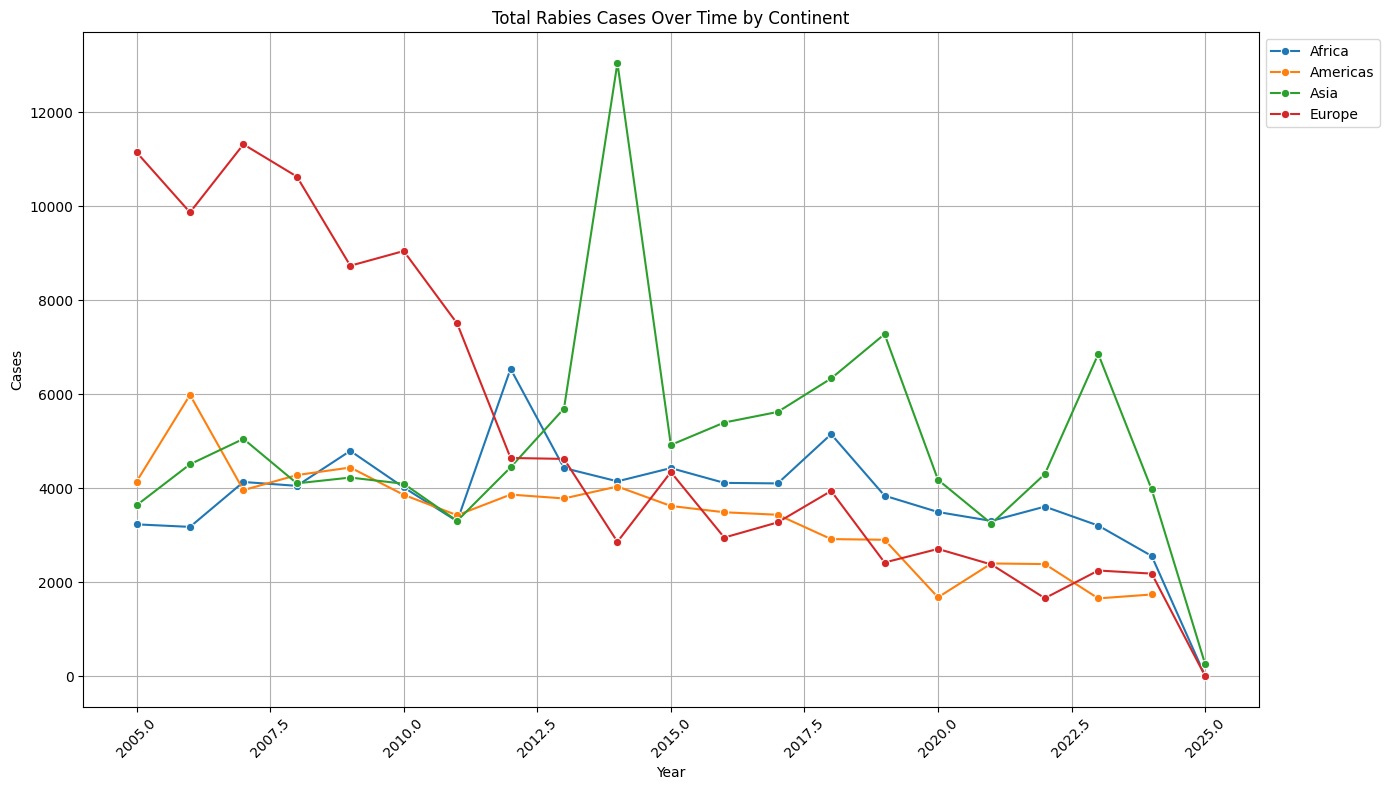

In [5]:
df_combined['Year'] = np.floor(df_combined['Year']).astype(int)
cases_year = df_combined.groupby(['Year', 'Continent'])['Cases'].sum().reset_index()

plt.figure(figsize=(14, 8))
sns.lineplot(data=cases_year, x='Year', y='Cases', hue='Continent', marker='o')
plt.title('Total Rabies Cases Over Time by Continent')
plt.ylabel('Cases')
plt.xlabel('Year')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()


In [6]:
df_combined = df_combined[df_combined['Cases'] <= 10000]
df_combined = df_combined[df_combined['Animal Category'] != 'Both animal categories']

df_combined[df_combined['Continent'] == 'Asia'] \
    .groupby(['Year', 'Country'])['Cases'] \
    .sum().sort_values(ascending=False).head(10)

,,Cases
Year,Country,
2014,India,8083.0
2019,Indonesia,1943.0
2023,Indonesia,1817.0
2024,Philippines,1518.0
2018,Thailand,1429.0
2019,Türkiye (Rep. of),1381.0
2023,Vietnam,1378.0
2005,Philippines,1368.0
2022,Indonesia,1361.0


/tmp/ipython-input-2470760918.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_countries, x='Cases', y='Country', palette='Reds_r')


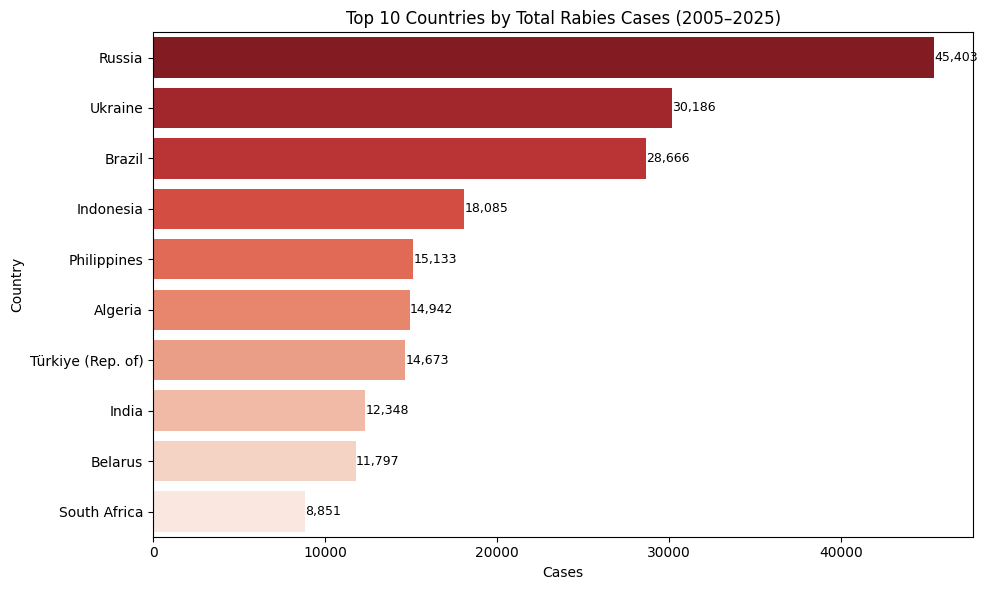

In [7]:
top_countries = df_combined.groupby('Country')['Cases'].sum().nlargest(10).reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=top_countries, x='Cases', y='Country', palette='Reds_r')

plt.title('Top 10 Countries by Total Rabies Cases (2005–2025)')
plt.xlabel('Cases')
plt.ylabel('Country')

for index, row in top_countries.iterrows():
    plt.text(row['Cases'], index, f"{int(row['Cases']):,}",
             va='center', ha='left', fontsize=9, color='black')

plt.tight_layout()
plt.show()


/tmp/ipython-input-482240704.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=animal_category, y='Animal Category', x='Cases', palette='viridis')


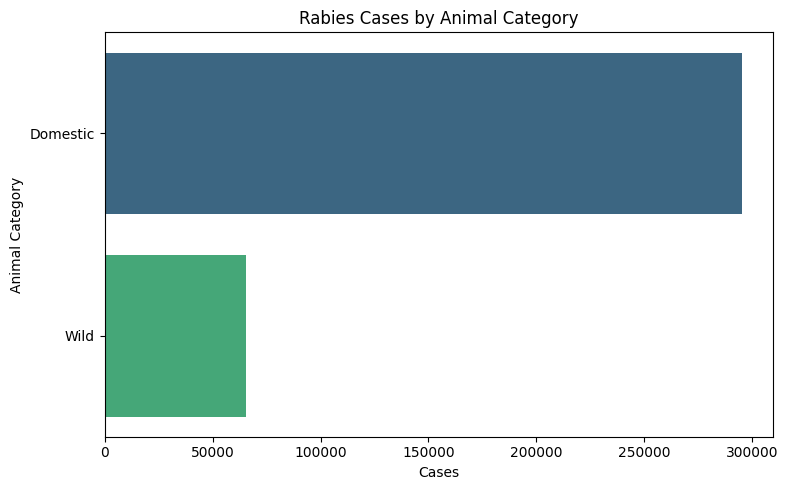

In [8]:
animal_category = (
    df_combined[df_combined['Animal Category'] != 'Both animal categories']
    .groupby('Animal Category')['Cases']
    .sum()
    .reset_index()
    .sort_values(by='Cases', ascending=False)
)
df_combined = df_combined[df_combined['Cases'] > 0]
animal_category = df_combined.groupby('Animal Category')['Cases'].sum().reset_index().sort_values(by='Cases', ascending=False)

plt.figure(figsize=(8, 5))
sns.barplot(data=animal_category, y='Animal Category', x='Cases', palette='viridis')
plt.title('Rabies Cases by Animal Category')
plt.xlabel('Cases')
plt.ylabel('Animal Category')
plt.tight_layout()
plt.show()


/tmp/ipython-input-1535522612.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_species, x='Cases', y='Species', palette='magma')


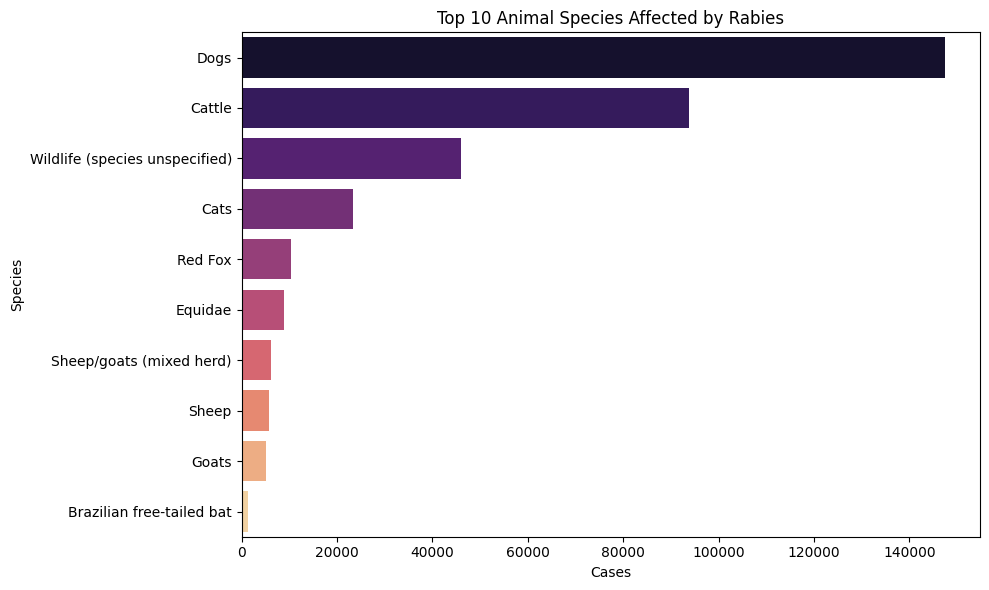

In [9]:
top_species = df_combined.groupby('Species')['Cases'].sum().nlargest(10).reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=top_species, x='Cases', y='Species', palette='magma')
plt.title('Top 10 Animal Species Affected by Rabies')
plt.xlabel('Cases')
plt.ylabel('Species')
plt.tight_layout()
plt.show()


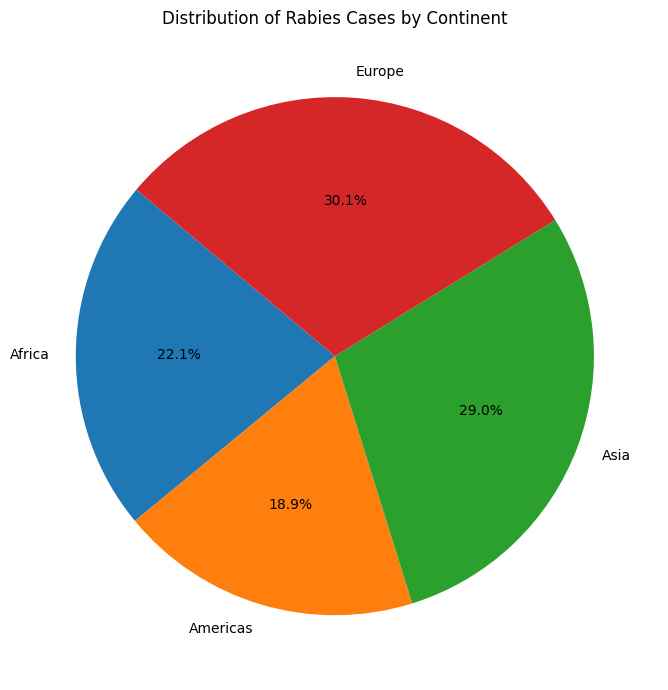

In [10]:
continent_cases = df_combined.groupby('Continent')['Cases'].sum()

plt.figure(figsize=(7, 7))
plt.pie(continent_cases, labels=continent_cases.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Rabies Cases by Continent')
plt.tight_layout()
plt.show()


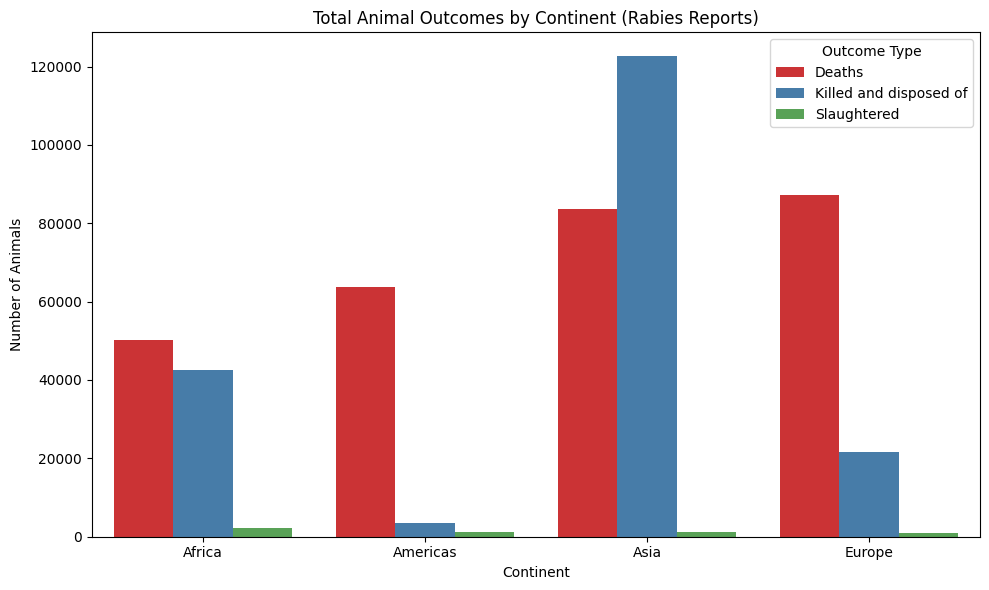

In [11]:
for col in ['Killed and disposed of', 'Slaughtered', 'Deaths']:
    df_combined[col] = pd.to_numeric(df_combined[col], errors='coerce')

outcome_df = df_combined.melt(
    id_vars=['Continent'],
    value_vars=['Killed and disposed of', 'Slaughtered', 'Deaths'],
    var_name='Outcome',
    value_name='Count'
)

outcome_df = outcome_df.dropna(subset=['Count'])
outcome_df = outcome_df[outcome_df['Count'] > 0]

outcome_by_continent = outcome_df.groupby(['Continent', 'Outcome'])['Count'].sum().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=outcome_by_continent, x='Continent', y='Count', hue='Outcome', palette='Set1')
plt.title('Total Animal Outcomes by Continent (Rabies Reports)')
plt.ylabel('Number of Animals')
plt.xlabel('Continent')
plt.legend(title='Outcome Type')
plt.tight_layout()
plt.show()


/tmp/ipython-input-3063409495.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_killed, x='Killed and disposed of', y='Country', palette='Blues_r')


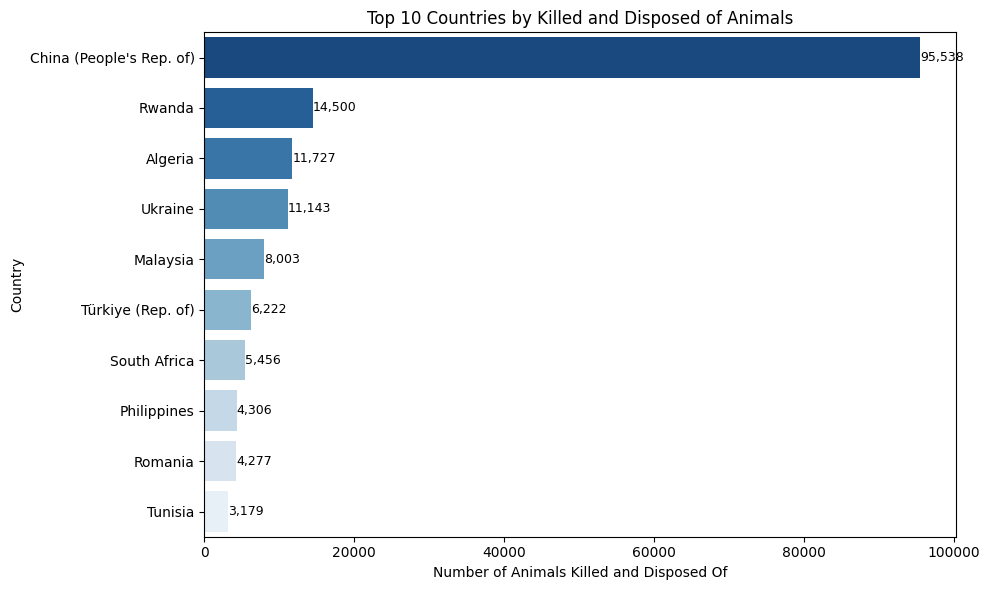

In [12]:
df_combined['Killed and disposed of'] = pd.to_numeric(df_combined['Killed and disposed of'], errors='coerce').fillna(0)


top_killed = df_combined.groupby('Country')['Killed and disposed of'].sum().nlargest(10).reset_index()


plt.figure(figsize=(10, 6))
sns.barplot(data=top_killed, x='Killed and disposed of', y='Country', palette='Blues_r')

plt.title('Top 10 Countries by Killed and Disposed of Animals')
plt.xlabel('Number of Animals Killed and Disposed Of')
plt.ylabel('Country')


for i, row in top_killed.iterrows():
    plt.text(row['Killed and disposed of'], i, f"{int(row['Killed and disposed of']):,}",
             va='center', ha='left', fontsize=9, color='black')

plt.tight_layout()
plt.show()


In [142]:
df_combined.to_csv("combined_tableau.csv", index=False)

# Cases of rabies in animals in Israel

In [13]:
df_israel = df_israel.drop(columns=['LinkToTest', 'OpenLink', 'LinkToMre', 'LinkMoreOpen', 'LocationNotSettlementEng', 'LocationNotSettlementHeb', 'Animal_Lab_ID', 'GlobalID', 'RegionHeb', 'SpeciesNameHeb', 'SettlementHeb'])
df_israel.columns = df_israel.columns.str.strip()

In [44]:
print("Shape of dataset:", df_israel.shape)
print("\nData Types:\n", df_israel.dtypes)
print("\nMissing Values:\n", df_israel.isnull().sum())
print("\nUnique Values per Column:\n", df_israel.nunique())

Shape of dataset: (740, 14)

Data Types:
 OBJECTID                   int64
Event                    float64
Date              datetime64[ns]
Year                       int64
SpeciesNameEng            object
RegionEng                 object
Species                   object
SettlementEng             object
CreationDate      datetime64[ns]
Creator                   object
EditDate          datetime64[ns]
Editor                    object
x                        float64
y                        float64
dtype: object

Missing Values:
 OBJECTID          0
Event             0
Date              0
Year              0
SpeciesNameEng    0
RegionEng         0
Species           0
SettlementEng     0
CreationDate      0
Creator           0
EditDate          0
Editor            0
x                 1
y                 1
dtype: int64

Unique Values per Column:
 OBJECTID          740
Event              91
Date              609
Year               20
SpeciesNameEng     13
RegionEng           6
Species    

In [38]:
df_israel['Species'] = df_israel.apply(
    lambda row: row['SpeciesNameEng'] if pd.isnull(row['Species']) else row['Species'], axis=1
)
df_israel = df_israel.dropna(subset=['Species'])

In [43]:
print(df_israel[df_israel['Species'].isnull()][['Species', 'SpeciesNameEng', 'RegionEng']].head())
print(df_israel[df_israel['SettlementEng'].isnull()][['SettlementEng', 'RegionEng', 'x', 'y']].head())
df_israel['SettlementEng'].fillna('Unknown', inplace=True)

Empty DataFrame
Columns: [Species, SpeciesNameEng, RegionEng]
Index: []
Empty DataFrame
Columns: [SettlementEng, RegionEng, x, y]
Index: []


In [49]:
df_israel['x'] = df_israel.groupby('RegionEng')['x'].transform(lambda g: g.fillna(g.mean()))
df_israel['y'] = df_israel.groupby('RegionEng')['y'].transform(lambda g: g.fillna(g.mean()))

In [50]:
date_cols = ['Date', 'CreationDate', 'EditDate']
for col in date_cols:
    df_israel[col] = pd.to_datetime(df_israel[col], errors='coerce')


cat_cols = ['SpeciesNameEng', 'RegionEng', 'Species', 'SettlementEng']
for col in cat_cols:
    print(f"Top values in '{col}':")
    print(df_israel[col].value_counts().head(5))

Top values in 'SpeciesNameEng':
SpeciesNameEng
Jackal    267
Dog       263
Cattle    119
Fox        24
Sheep      17
Name: count, dtype: int64
Top values in 'RegionEng':
RegionEng
Galil Golan      393
Amakim           231
Galil Maaravi     73
Hasharon          20
Negev             12
Name: count, dtype: int64
Top values in 'Species':
Species
VII      220
VII B    154
VII A    150
VIIA      87
I         38
Name: count, dtype: int64
Top values in 'SettlementEng':
SettlementEng
Majdal Shams    15
Yardena         14
Menahemya       14
Unknown         14
Dan             13
Name: count, dtype: int64


/tmp/ipython-input-3486785885.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_israel, x='Year', palette='tab20b')


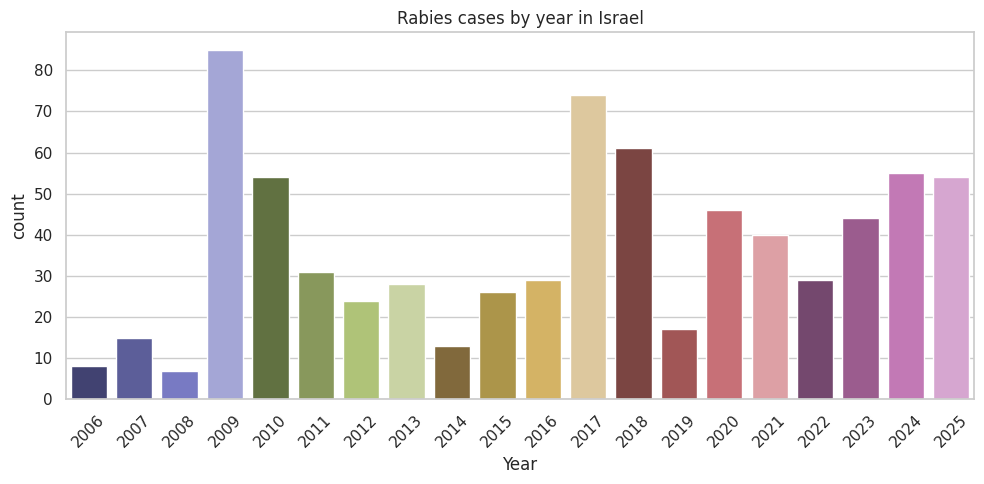

In [51]:
pd.set_option('display.max_columns', None)
sns.set(style='whitegrid')

plt.figure(figsize=(10, 5))
sns.countplot(data=df_israel, x='Year', palette='tab20b')
plt.title("Rabies cases by year in Israel")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

/tmp/ipython-input-2976273512.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_israel, y='RegionEng', order=df_israel['RegionEng'].value_counts().index, palette='viridis')


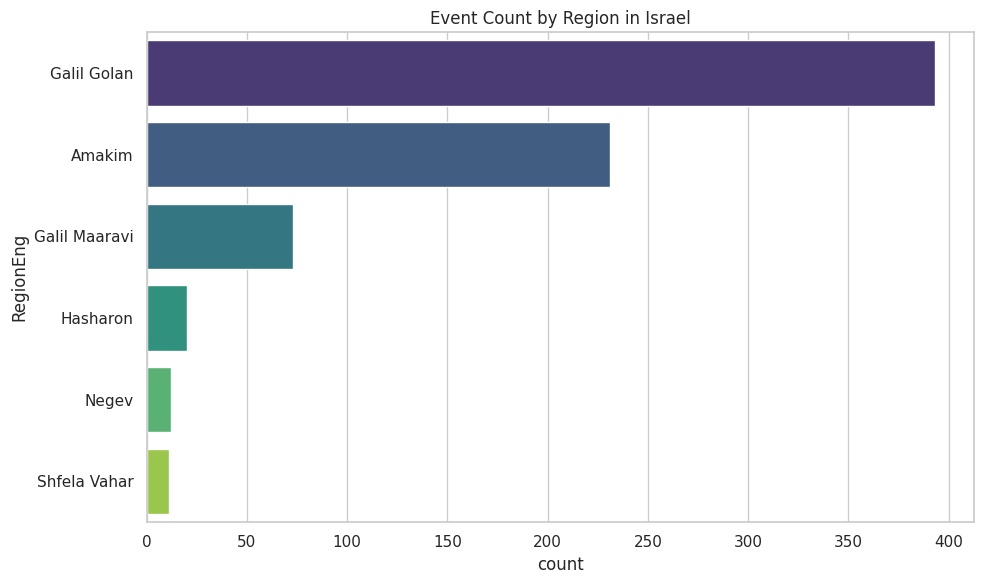

In [52]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df_israel, y='RegionEng', order=df_israel['RegionEng'].value_counts().index, palette='viridis')
plt.title("Event Count by Region in Israel")
plt.tight_layout()
plt.show()

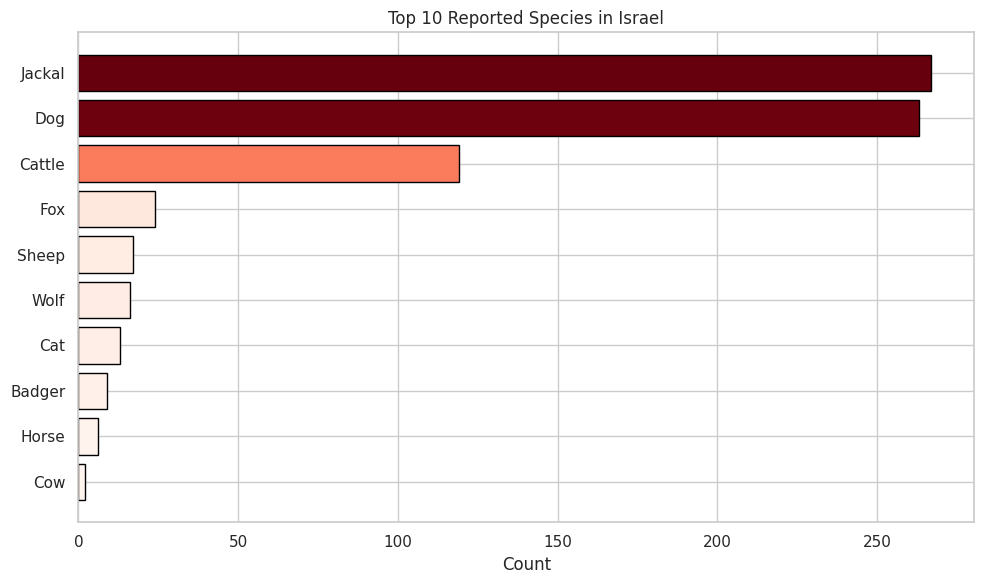

In [53]:
top_species = df_israel['SpeciesNameEng'].value_counts().nlargest(10)
species_names = top_species.index
species_counts = top_species.values

norm = plt.Normalize(min(species_counts), max(species_counts))
colors = plt.cm.Reds(norm(species_counts))

plt.figure(figsize=(10, 6))
plt.barh(species_names, species_counts, color=colors, edgecolor='black', linewidth=1)
plt.title("Top 10 Reported Species in Israel")
plt.xlabel("Count")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

In [144]:
df_israel.to_csv("israel_tableau.csv", index=False)

# Human deaths by rabies in the world

In [82]:
df_human = pd.read_excel ('HumanDeaths22_10.xlsx', header = 0)

In [83]:
df_human.columns = df_human.iloc[0]

In [84]:
df_human = df_human.drop(index=[0, 1]).reset_index(drop=True)

In [103]:
df_human.head()

,Country,Year,Deaths
0,Afghanistan,2022,18.0
1,Albania,2022,NaN
2,Algeria,2022,NaN
3,Andorra,2022,NaN
4,Angola,2022,NaN


In [101]:
df_human.rename(columns={df_human.columns[0]: "Country"}, inplace=True)
for col in df_human.columns[1:]:
    df_human[col] = pd.to_numeric(df_human[col], errors='coerce')

print(df_human.head())

       Country  Year  Deaths
0  Afghanistan  2022    18.0
1      Albania  2022     NaN
2      Algeria  2022     NaN
3      Andorra  2022     NaN
4       Angola  2022     NaN


In [102]:
df_long = df_human.melt(id_vars='Country', var_name='Year', value_name='Deaths')
print(df_long.head())

ValueError: value_name (Deaths) cannot match an element in the DataFrame columns.

In [104]:
top_10_total = (
    df_human.groupby('Country')['Deaths']
    .sum(min_count=1)
    .sort_values(ascending=False)
    .head(10)
    .reset_index()
)

print("Top 10 countries by total deaths:")
print(top_10_total)

Top 10 countries by total deaths:
                       Country  Deaths
0                        China  9354.0
1                        India  4656.0
2                  Philippines  3014.0
3                      Myanmar  1373.0
4                        Kenya  1115.0
5                     Viet Nam  1108.0
6                       Angola   671.0
7                   Bangladesh   454.0
8                    Sri Lanka   384.0
9  United Republic of Tanzania   324.0


In [105]:
no_data_countries = df_human.groupby('Country')['Deaths'].apply(lambda x: x.isna().all())
no_data_list = no_data_countries[no_data_countries].index.tolist()

print("Countries with no death data at all:")
print(no_data_list)

Countries with no death data at all:
['Andorra', 'Applied filters:\nLocation type is Country\nLANGUAGE_CODE is en\nIndicatorCode is NTD_RAB2', 'Burundi', 'Cameroon', 'Central African Republic', 'Comoros', 'Congo', 'Cook Islands', "Democratic People's Republic of Korea", 'Djibouti', 'Equatorial Guinea', 'Eritrea', 'Gambia', 'Guinea', 'Iceland', 'Kiribati', 'Libya', 'Marshall Islands', 'Mauritania', 'Micronesia (Federated States of)', 'Monaco', 'Montenegro', 'Namibia', 'Nauru', 'Niue', 'Pakistan', 'Palau', 'Papua New Guinea', 'Rwanda', 'Samoa', 'San Marino', 'Sao Tome and Principe', 'Solomon Islands', 'South Sudan', 'Togo', 'Tonga', 'Tuvalu', 'Vanuatu', 'Zambia']


In [106]:
deaths_per_year = (
    df_human.groupby('Year')['Deaths']
    .sum(min_count=1)
    .sort_index(ascending=False)
)

print("Total deaths per year:")
print(deaths_per_year)


Total deaths per year:
Year
2022     795.0
2021    1141.0
2020     906.0
2019    1401.0
2018    1248.0
2017    2936.0
2016    3466.0
2015    2792.0
2014    1521.0
2013    1944.0
2012    2155.0
2011    2766.0
2010    2983.0
Name: Deaths, dtype: float64


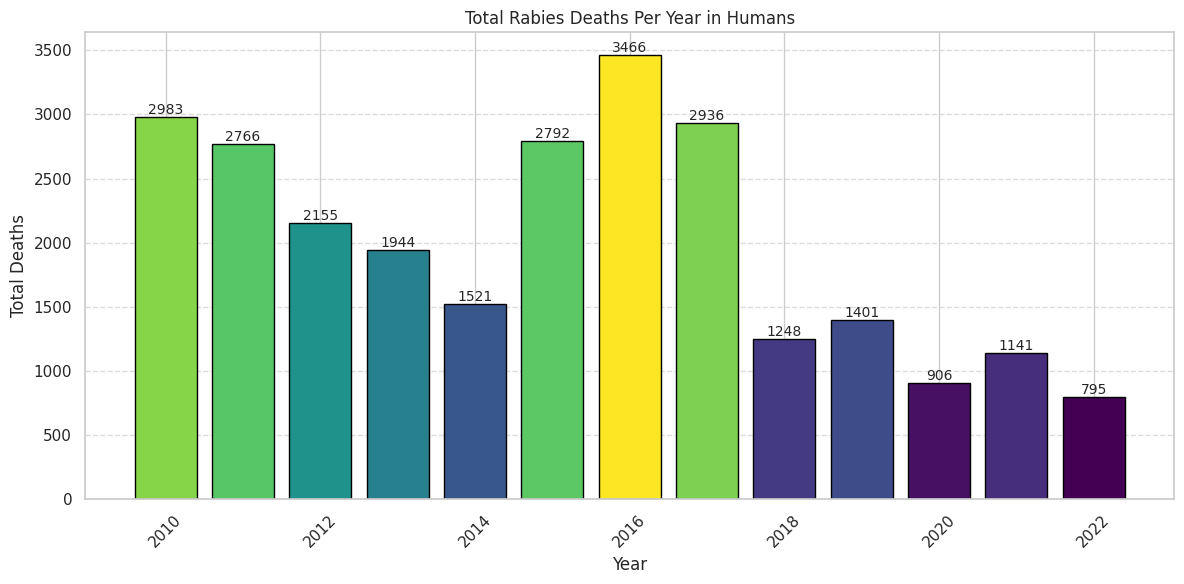

In [117]:
import matplotlib.cm as cm

norm = plt.Normalize(deaths_per_year.min(), deaths_per_year.max())
colors = cm.viridis(norm(deaths_per_year.values))
plt.figure(figsize=(12, 6))
bars = plt.bar(deaths_per_year.index, deaths_per_year.values, color=colors, edgecolor='black')

for bar in bars:
    height = bar.get_height()
    if not np.isnan(height):
        plt.text(
            bar.get_x() + bar.get_width() / 2,
            height,
            f'{int(height)}',
            ha='center',
            va='bottom',
            fontsize=10
        )
plt.title('Total Rabies Deaths Per Year in Humans')
plt.xlabel('Year')
plt.ylabel('Total Deaths')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

/tmp/ipython-input-3439607166.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_10_total, x='Deaths', y='Country', palette='Reds_r')


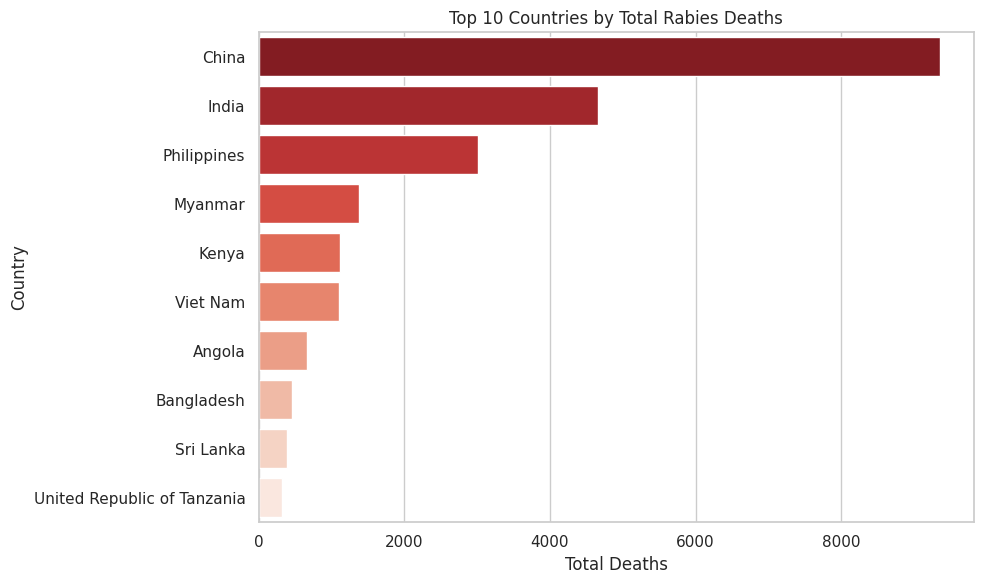

In [107]:
plt.figure(figsize=(10, 6))
sns.barplot(data=top_10_total, x='Deaths', y='Country', palette='Reds_r')
plt.title('Top 10 Countries by Total Rabies Deaths in Humans')
plt.xlabel('Total Deaths')
plt.ylabel('Country')
plt.tight_layout()
plt.show()


In [121]:
no_data_countries = df_human.groupby('Country')['Deaths'].apply(lambda x: x.isna().all())
num_no_data = no_data_countries.sum()
num_with_data = no_data_countries.size - num_no_data

total_countries = num_no_data + num_with_data
prop_with_data = num_with_data / total_countries
prop_no_data = num_no_data / total_countries

print(f"Countries with at least one death case: {num_with_data} ({prop_with_data:.2%})")
print(f"Countries with no info at all: {num_no_data} ({prop_no_data:.2%})")


Countries with at least one death case: 156 (80.00%)
Countries with no info at all: 39 (20.00%)


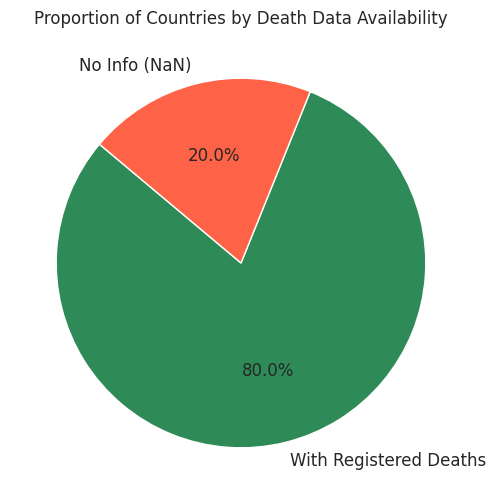

In [122]:
labels = ['With Registered Deaths', 'No Info (NaN)']
sizes = [num_with_data, num_no_data]
colors = ['seagreen', 'tomato']

plt.figure(figsize=(6,6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140, textprops={'fontsize': 12})
plt.title('Proportion of Countries by Death Data Availability')
plt.show()


In [146]:
df_human.to_csv("human_tableau.csv", index=False)

# Analysis of countries per their integration in Rabies Control Program

In [123]:
df_cdc = pd.read_excel ('Rabies_by_country_CDC.xlsx')
df_cdc.head()

,Country,Lyssavirus Free,Rabies Virus Free,Canine (Dog) Rabies Free,Robust National Rabies Surveillance,Robust National Rabies Control Program Implemented,Vaccine Availability,RIG Availability
0,Afghanistan,No,No,No,No,No,Not Readily Available,Not Readily Available
1,Albania,No,No,Yes,No,No (Unknown),Available,Limited Availability
2,Algeria,No,No,No,No,No,Limited Availability,Limited Availability
3,American Samoa,No,No,Yes,No (Unknown),No (Unknown),Limited Availability,Limited Availability
4,Andorra,No,Yes,Yes,No (Unknown),No (Unknown),Available,Not Readily Available


In [124]:
print(df_cdc.info())
print(df_cdc.head())
print(df_cdc.describe(include='all'))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 8 columns):
 #   Column                                              Non-Null Count  Dtype 
---  ------                                              --------------  ----- 
 0   Country                                             240 non-null    object
 1   Lyssavirus Free                                     238 non-null    object
 2   Rabies Virus Free                                   238 non-null    object
 3   Canine (Dog) Rabies Free                            238 non-null    object
 4   Robust National Rabies Surveillance                 238 non-null    object
 5   Robust National Rabies Control Program Implemented  238 non-null    object
 6   Vaccine Availability                                238 non-null    object
 7   RIG Availability                                    238 non-null    object
dtypes: object(8)
memory usage: 15.1+ KB
None
          Country Lyssavirus Free Rabies Virus Fre

In [125]:
binary_columns = [
    'Lyssavirus Free',
    'Rabies Virus Free',
    'Canine (Dog) Rabies Free',
    'Robust National Rabies Surveillance',
    'Robust National Rabies Control Program Implemented'
]

for col in binary_columns:
    print(f"\nValue counts for {col}:")
    print(df_cdc[col].value_counts(dropna=False))



Value counts for Lyssavirus Free:
Lyssavirus Free
No     208
Yes     30
NaN      2
Name: count, dtype: int64

Value counts for Rabies Virus Free:
Rabies Virus Free
No     161
Yes     77
NaN      2
Name: count, dtype: int64

Value counts for Canine (Dog) Rabies Free:
Canine (Dog) Rabies Free
Yes    125
No     113
NaN      2
Name: count, dtype: int64

Value counts for Robust National Rabies Surveillance:
Robust National Rabies Surveillance
No              99
Yes             72
No (Unknown)    67
NaN              2
Name: count, dtype: int64

Value counts for Robust National Rabies Control Program Implemented:
Robust National Rabies Control Program Implemented
No              96
No (Unknown)    72
Yes             70
NaN              2
Name: count, dtype: int64


In [126]:
availability_columns = ['Vaccine Availability', 'RIG Availability']

for col in availability_columns:
    print(f"\nValue counts for {col}:")
    print(df_cdc[col].value_counts(dropna=False))



Value counts for Vaccine Availability:
Vaccine Availability
Limited Availability     128
Available                 92
Not Readily Available     18
NaN                        2
Name: count, dtype: int64

Value counts for RIG Availability:
RIG Availability
Limited Availability     124
Not Readily Available     76
Available                 38
NaN                        2
Name: count, dtype: int64


In [127]:
fully_free = df_cdc[
    (df_cdc['Lyssavirus Free'] == 'Yes') &
    (df_cdc['Rabies Virus Free'] == 'Yes') &
    (df_cdc['Canine (Dog) Rabies Free'] == 'Yes')
]

print(f"Countries fully free of rabies (all Yes): {fully_free['Country'].tolist()}")


Countries fully free of rabies (all Yes): ['Antarctica', 'Christmas Island (Australia)', 'Cocos (Keeling) Islands (Australia)', 'Cook Islands (New Zealand)', 'Easter Island (Chile)', 'Falkland Islands (U.K.)', 'Fiji', 'French Polynesia (France)', 'Galapagos Islands', 'Guam (U.S.)', 'Kiribati', 'Maldives', 'Marshall Islands', 'Micronesia, Federated States of', 'Nauru', 'New Caledonia (France)', 'New Zealand', 'Niue (New Zealand)', 'Norfolk Island (Australia)', 'Northern Mariana Islands (U.S.); Including Saipan, Tinian, and Rota Island', 'Palau', 'Pitcairn Islands (U.K.)', 'Samoa', 'Solomon Islands', 'South Georgia and the South Sandwich Islands (U.K.)', 'Tokelau (New Zealand)', 'Tonga', 'Tuvalu', 'Vanuatu', 'Wake Island']


In [128]:
robust_program = df_cdc[
    (df_cdc['Robust National Rabies Surveillance'] == 'Yes') &
    (df_cdc['Robust National Rabies Control Program Implemented'] == 'Yes')
]

print(f"Countries with robust surveillance and control program: {robust_program['Country'].tolist()}")


Countries with robust surveillance and control program: ['Australia', 'Austria', 'Bahrain', 'Belgium', 'Bhutan', 'Bosnia and Herzegovina', 'Canada', 'Chile', 'Czech Republic', 'Denmark', 'Finland', 'France', 'French Guiana (France)', 'Germany', 'Greenland (Denmark)', 'Grenada', 'Guadeloupe (Including St. Barthelemy and St. Martin [France])', 'Guam (U.S.)', 'Iceland', 'Ireland', 'Italy (Including Holy See, Vatican City)', 'Japan', 'Kosovo', 'Liechtenstein', 'Luxembourg', 'Martinique (France)', 'Mayotte (France)', 'Mexico', 'Monaco', 'Montenegro', 'Netherlands, The', 'New Zealand', 'Nicaragua', 'Norway (mainland)', 'Panama', 'Paraguay', 'Portugal', 'Puerto Rico (U.S.)', 'Réunion (France)', 'Saint Pierre and Miquelon (France)', 'Singapore', 'South Korea', 'Spain (mainland)', 'Sweden', 'Switzerland', 'Taiwan', 'United Kingdom (Including England, Scotland, Wales, and Northern Ireland)', 'United States', 'Virgin Islands, U.S.']


In [129]:
for col in ['Vaccine Availability', 'RIG Availability']:
    print(f"\n{col} status counts:")
    print(df_cdc[col].value_counts())



Vaccine Availability status counts:
Vaccine Availability
Limited Availability     128
Available                 92
Not Readily Available     18
Name: count, dtype: int64

RIG Availability status counts:
RIG Availability
Limited Availability     124
Not Readily Available     76
Available                 38
Name: count, dtype: int64


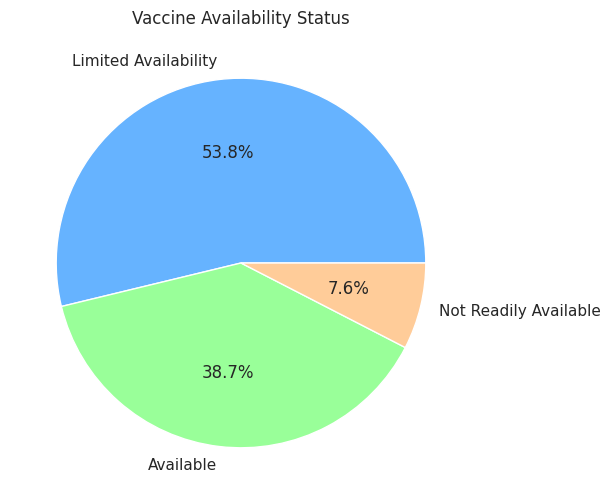

In [130]:
df_cdc['Vaccine Availability'].value_counts().plot.pie(
    autopct='%1.1f%%',
    figsize=(6, 6),
    title='Vaccine Availability Status',
    colors=['#66b3ff','#99ff99','#ffcc99','#ff6666']
)
plt.ylabel('')
plt.show()


/tmp/ipython-input-105305694.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_cdc, x='Rabies Virus Free', palette='Set2')


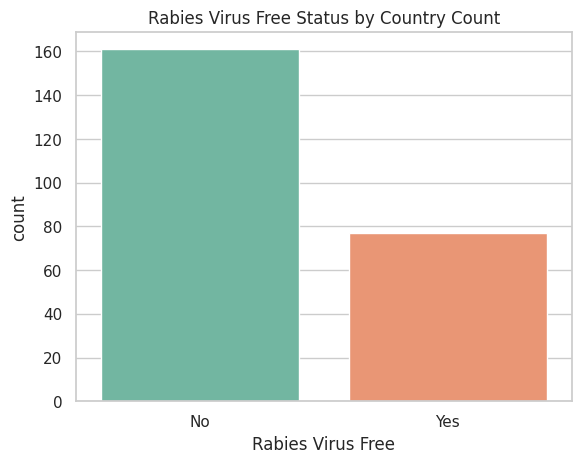

In [132]:
sns.countplot(data=df_cdc, x='Rabies Virus Free', palette='Set2')
plt.title('Rabies Virus Free Status by Country Count')
plt.show()


In [134]:
rabies_free = df_cdc[
    (df_cdc['Lyssavirus Free'] == 'Yes') &
    (df_cdc['Rabies Virus Free'] == 'Yes') &
    (df_cdc['Canine (Dog) Rabies Free'] == 'Yes')
]
total_countries = len(df_cdc)
rabies_free_count = len(rabies_free)

print(f"Rabies-Free Countries: {rabies_free_count}/{total_countries} ({rabies_free_count / total_countries:.1%})")


Rabies-Free Countries: 30/240 (12.5%)


In [139]:
best_rabies_env = df_cdc[
    (df_cdc['Lyssavirus Free'] == 'Yes') &
    (df_cdc['Rabies Virus Free'] == 'Yes') &
    (df_cdc['Canine (Dog) Rabies Free'] == 'Yes') &
    (df_cdc['Robust National Rabies Surveillance'] == 'Yes') &
    (df_cdc['Robust National Rabies Control Program Implemented'] == 'Yes') &
    (df_cdc['Vaccine Availability'] == 'Available') &
    (df_cdc['RIG Availability'] == 'Available')
]

print("Countries with the best rabies environment:")
print(best_rabies_env['Country'].tolist())


Countries with the best rabies environment:
[]


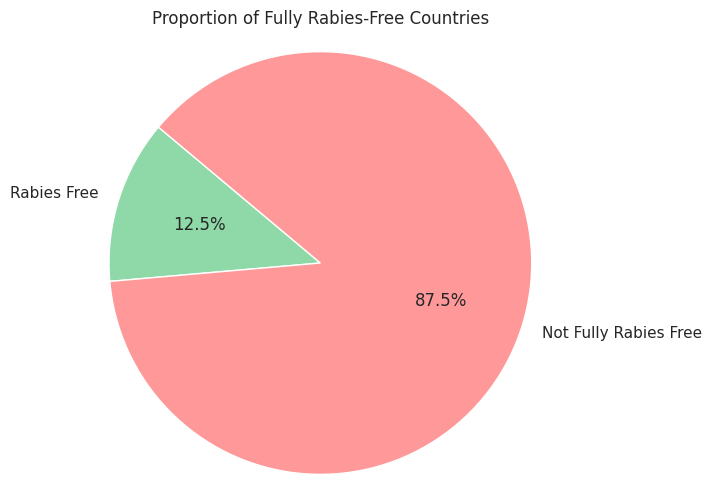

In [140]:
labels = ['Rabies Free', 'Not Fully Rabies Free']
sizes = [rabies_free_count, total_countries - rabies_free_count]

plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=['#8fd9a8','#ff9999'])
plt.title('Proportion of Fully Rabies-Free Countries')
plt.axis('equal')
plt.show()

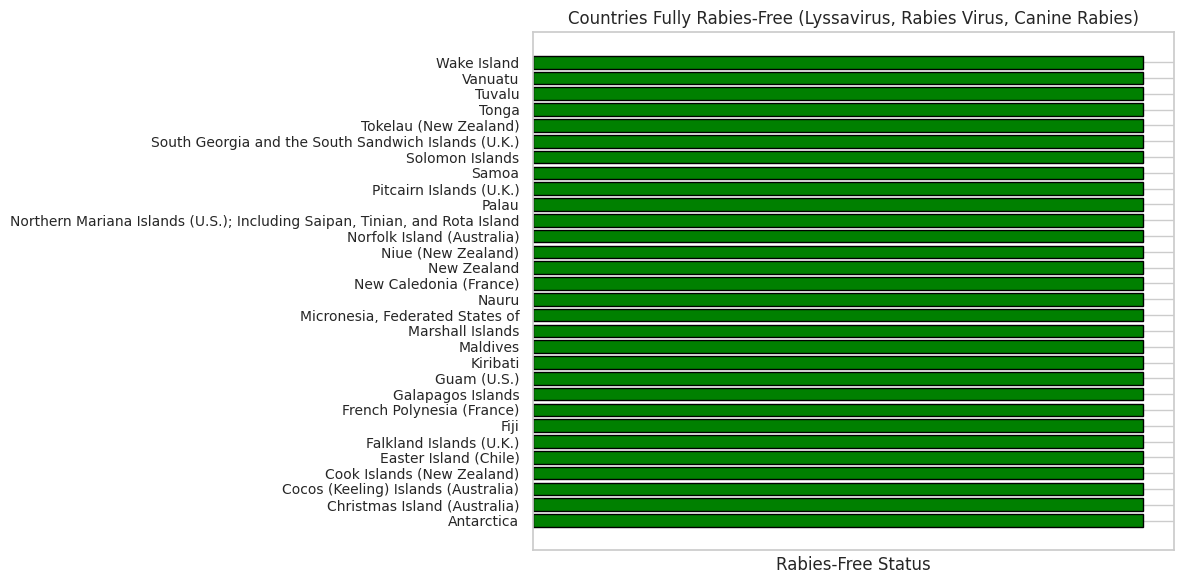

In [141]:
rabies_free_countries = df_cdc[
    (df_cdc['Lyssavirus Free'] == 'Yes') &
    (df_cdc['Rabies Virus Free'] == 'Yes') &
    (df_cdc['Canine (Dog) Rabies Free'] == 'Yes')
]['Country'].tolist()

plt.figure(figsize=(12, 6))
plt.barh(rabies_free_countries, [1]*len(rabies_free_countries), color='green', edgecolor='black')
plt.xlabel('Rabies-Free Status')
plt.title('Countries Fully Rabies-Free (Lyssavirus, Rabies Virus, Canine Rabies)')
plt.yticks(fontsize=10)
plt.xticks([])
plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

In [147]:
df_cdc.to_csv("cdc_tableau.csv", index=False)